In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend. plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib
import mlxtend                                                          
print(mlxtend.__version__)  

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPool1D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


0.14.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# df1 = pd.read_csv('/content/drive/My Drive/N.csv')
# df2 = pd.read_csv('/content/drive/My Drive/F.csv')
# df2 = df2.sample(4000)
# data = df1.append(df2,ignore_index= True)
data = pd.read_csv('/content/drive/My Drive/cutting.csv')

In [ ]:
data.shape

(12288, 8)

In [ ]:
data.isnull().sum()

pCut Motor: Torque                                      0
 pCut CTRL Position controller: Lag error               0
 pCut CTRL Position controller: Actual position         0
 pCut CTRL Position controller: Actual speed            0
 pSvolFilm CTRL Position controller: Actual position    0
 pSvolFilm CTRL Position controller: Actual speed       0
 pSvolFilm CTRL Position controller: Lag error          0
class                                                   0
dtype: int64

In [ ]:
data['class'].value_counts()

1    6144
0    6144
Name: class, dtype: int64

In [ ]:
normal = data[data['class']==0]
faulty = data[data['class']==1]
normal.shape, faulty.shape

((6144, 8), (6144, 8))

In [ ]:
X = data.drop('class', axis = 1)
y = data['class']
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 0, stratify =y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9216, 7), (3072, 7), (9216,), (3072,))

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
X_train.shape

(9216, 7)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)
X_train.shape, X_test.shape

((9216, 7, 1), (3072, 7, 1))

**Model**

In [ ]:
model = Sequential()
model.add(Conv1D(16,1,activation='relu', input_shape = X_train[0].shape))
model.add(MaxPool1D(1))
model.add(BatchNormalization())
# model.add(Dropout(0.2))

# model.add(Conv1D(32,2,activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPool1D(2))
# model.add(Dropout(0.2))

model.add(Conv1D(64,1,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(1))
# model.add(Dropout(0.2))

model.add(Conv1D(128,1,activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(1))
model.add(Dropout(0.2))

model.add(Flatten())
# model.add(Dense(64, activation = 'relu'))
# model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
# model.add(Dropout(0.2))
model.add(Dense(256, activation = 'relu'))
# model.add(Dropout(0.2))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 7, 16)             32        
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 7, 16)             0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 7, 16)             64        
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 7, 64)             1088      
_________________________________________________________________
batch_normalization_3 (Batch (None, 7, 64)             256       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 7, 64)             0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 7, 128)           

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
model.compile(optimizer=Adam(lr = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=8, 
        verbose=1, mode='auto', restore_best_weights=True)

In [ ]:
history = model.fit(X_train, y_train, epochs= 10, validation_data=(X_test, y_test),callbacks=[monitor], verbose=1)

Epoch 1/10
288/288 [==============================] - 2s 8ms/step - loss: 0.0049 - accuracy: 0.9988 - val_loss: 1.6995e-04 - val_accuracy: 1.0000
Epoch 2/10
288/288 [==============================] - 2s 8ms/step - loss: 0.0053 - accuracy: 0.9986 - val_loss: 5.1449e-04 - val_accuracy: 1.0000
Epoch 3/10
288/288 [==============================] - 2s 8ms/step - loss: 0.0104 - accuracy: 0.9973 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 4/10
288/288 [==============================] - 2s 9ms/step - loss: 0.0059 - accuracy: 0.9986 - val_loss: 2.0615e-04 - val_accuracy: 1.0000
Epoch 5/10
288/288 [==============================] - 2s 9ms/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 4.4034e-04 - val_accuracy: 0.9997
Epoch 6/10
288/288 [==============================] - 2s 8ms/step - loss: 0.0086 - accuracy: 0.9987 - val_loss: 6.8520e-04 - val_accuracy: 1.0000
Epoch 7/10
288/288 [==============================] - 2s 8ms/step - loss: 0.0102 - accuracy: 0.9983 - val_loss: 0.0708 - val_acc

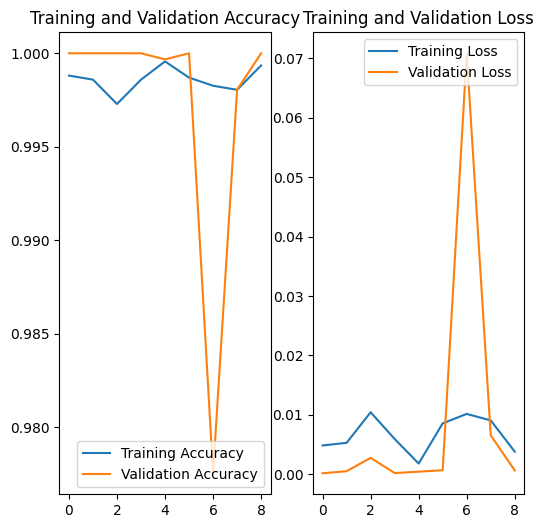

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

# epochs_range = range(epochs)

plt.figure(figsize=(6, 6))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# model = tf.keras.models.load_model('/content/drive/My Drive/milling_cnn_paper2.h5')
# model.summary()
loss, acc = model.evaluate(X_test,  y_test, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))


In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict_classes(X_test)
accuracy_score(y_test, y_pred)

ValueError: ignored

In [ ]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

In [ ]:
class_names = ['Normal','Fault']
mat = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=mat, figsize=(6,6), class_names = class_names, show_normed = False)
plt.tight_layout()
plt.show()
fig.savefig('cm.png')

NameError: ignored

In [ ]:
print(classification_report(y_test, y_pred))

NameError: ignored

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

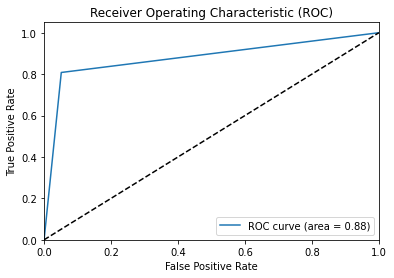

In [ ]:
plot_roc(y_pred,y_test)

In [ ]:
fig.savefig('ROC.png')